In [10]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [11]:
n_values = 32
x = tf.linspace(-3., 3., n_values)

sess = tf.Session()
result = sess.run(x)
print(result)

[-3.         -2.8064516  -2.612903   -2.419355   -2.2258065  -2.032258
 -1.8387097  -1.6451614  -1.451613   -1.2580645  -1.0645162  -0.87096786
 -0.6774194  -0.48387098 -0.29032278 -0.09677434  0.0967741   0.29032254
  0.48387098  0.6774192   0.8709676   1.0645161   1.2580643   1.451613
  1.6451612   1.8387094   2.032258    2.2258062   2.4193544   2.612903
  2.8064513   3.        ]


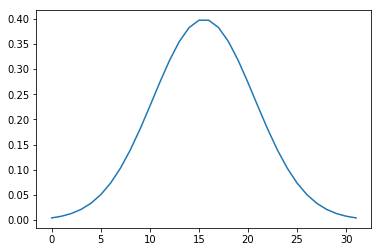

In [13]:

# Setup an interactive session so 
# you don't have to pass sesison around:
sess = tf.InteractiveSession()

# %% Now a tf.Operation

sigma = 1.0
mean = 0.0

z = (tf.exp(tf.negative(tf.pow(x - mean, 2.0) /
                   (2.0 * tf.pow(sigma, 2.0)))) *
     (1.0 / (sigma * tf.sqrt(2.0 * 3.1415))))

# %% By default, new operations are added to the default Graph
assert z.graph is tf.get_default_graph()

# %% Execute the graph and plot the result
plt.plot(z.eval())

In [22]:
print(z.get_shape())
print(z.get_shape().as_list())

# Combining tensors like:

stack = tf.stack([tf.shape(z), tf.shape(z), [3], [4]])
print("Eval'ed stack:")
print(stack.eval())

(32,)
[32]
Eval'ed stack:
[[32]
 [32]
 [ 3]
 [ 4]]


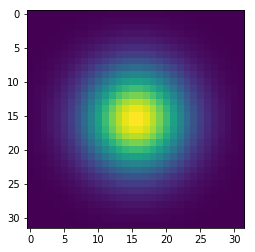

In [26]:
z_2d = tf.matmul(tf.reshape(z, [n_values, 1]), tf.reshape(z, [1, n_values]))

plt.imshow(z_2d.eval())

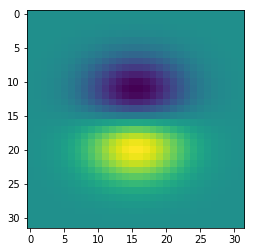

In [27]:
x = tf.reshape(tf.sin(tf.linspace(-3.0, 3.0, n_values)), [n_values, 1])
y = tf.reshape(tf.ones_like(x), [1, n_values])
z = tf.multiply(tf.matmul(x, y), z_2d)
plt.imshow(z.eval())